# Homework 7: Kernel K-Means and EM
This homework is due on Thursday April 1,2021


## Problem 1: Kernel K-Means

In this exercise, we will consider how one may go about performing non-linear machine learning by adapting machine learning algorithms that we have discussed in class.  We will discuss one particular approach that has been widely used throughout machine learning.  Recall the discussion from lecture: we take our feature vectors $\boldsymbol{x}_1, ..., \boldsymbol{x}_n$ and apply a non-linear function $\phi$ to each point to yield $\phi(\boldsymbol{x}_1), ..., \phi(\boldsymbol{x}_n)$.  Then, if we apply a linear machine learning algorithm (e.g., k-means or SVM) on the mapped data, the linear boundary in the mapped space will correspond to a non-linear boundary in the input space.

We looked at one particular mapping in class.  Consider a two-dimensional feature vector $\boldsymbol{x} = (x_1, x_2)^T$, and define the function $\phi$ as 

\begin{equation*}
\phi(\boldsymbol{x}) = \left(
\begin{array}{c}
1 \\
\sqrt{2} x_1 \\
\sqrt{2} x_2 \\
\sqrt{2} x_1 x_2\\
x_1^2\\
x_2^2
\end{array} \right).
\end{equation*}

As discussed in class, the inner product $\phi(\boldsymbol{x}_i)^T \phi(\boldsymbol{x}_j)$ between two mapped vectors is equal to $(\boldsymbol{x}_i^T \boldsymbol{x}_j + 1)^2$; that is, one can compute the inner product between data points in the mapped space without explicitly forming the 6-dimensional mapped vectors for the data. Because applying such a mapping may be computationally expensive, this trick can allow us to run machine learning algorithms in the mapped space without explicitly forming the mappings. For instance, in a k-NN classifier, one must compute the (squared) Euclidean distance between a test point $\boldsymbol{x}_t$ and a training point $\boldsymbol{x}_i$. Expanding this distance out yields

\begin{equation*}
\|\boldsymbol{x}_t - \boldsymbol{x}_i\|^2_2 = (\boldsymbol{x}_t - \boldsymbol{x}_i)^T (\boldsymbol{x}_t - \boldsymbol{x}_i) = \boldsymbol{x}_t^T \boldsymbol{x}_t - 2 \boldsymbol{x}_t^T \boldsymbol{x}_i + \boldsymbol{x}_i^T \boldsymbol{x}_i.
\end{equation*}

Then, computing this distance after applying the mapping $\phi$ would be easy:

\begin{equation*}
\|\phi(\boldsymbol{x}_t) - \phi(\boldsymbol{x}_i)\|^2_2 = (\boldsymbol{x}_t^T \boldsymbol{x}_t + 1)^2 - 2 (\boldsymbol{x}_t^T \boldsymbol{x}_i + 1)^2 + (\boldsymbol{x}_i^T \boldsymbol{x}_i + 1)^2.
\end{equation*}

**a.** In the example above, the original feature vector was 2-dimensional. Show how to generalize the $\phi$ mapping to $d$-dimensional vector inputs such that the inner product between mapped vectors is $(\boldsymbol{x}_i^T \boldsymbol{x}_j + 1)^2$. Explicitly describe the embedding $\phi$; what dimensions does it have, and what values will it represent?

**b.** Consider extending the k-means algorithm to discover non-linear boundaries using the above mapping. In the k-means algorithm, the assignment step involves computing $\|\boldsymbol{x}_i - \boldsymbol{\mu}_j\|_2^2$ for each point $\boldsymbol{x}_i$ and each cluster mean $\boldsymbol{\mu}_j$.  Suppose we map the data via $\phi$. How would one compute the distance $\|\phi(\boldsymbol{x}_i) - \boldsymbol{\mu}_j\|^2_2$, where now $\boldsymbol{\mu}_j$ is the mean of the mapped data points? Be careful: one cannot simply compute

\begin{equation*}
 (\boldsymbol{x}_i^T \boldsymbol{x}_i + 1)^2 - 2 (\boldsymbol{x}_i^T \boldsymbol{\mu}_j + 1)^2 + (\boldsymbol{\mu}_j^T \boldsymbol{\mu}_j + 1)^2.
\end{equation*}

**c.** Write out pseudocode for the extension of k-means where this mapping is applied to the data. In your algorithm, be careful not to ever explicitly compute $\phi(\boldsymbol{x}_i)$ for any data vector; *only work with inner products in the algorithm.*

**d.** With this new mapping, what properties will the decision surface have (i.e, what could it look like)? Why is this?

c) 
1. Map data x to phi(x)
2. Randomly pick j samples from mapped phi(xi) as the class centers
3. Arrange any sample x to its kth class by h(x) = argmin(l2_distance(phi(x)-meanj)
4. Update cluster centers and the cost function J = argmin(l2_distance(phi(xi)-meanj) 
5. Repeat steps 3-4 until cost J doesn't change or the change is very small

## Problem 2: Expectation-Maximization (E-M) on Gaussian Mixtrue Model

As you saw in lecture, the expectation-maximization algorithm is an iterative method to find maximum likelihood (ML) estimates of parameters in statistical models. The E-M algorithm alternates between performing an expectation (E) step, which creates a function for the expectation of the log-likelihood evaluated using the current estimate for the parameters, and a maximization (M) step, which computes parameters maximizing the expected log-likelihood found on the E step. This alternation repeats until convergence.


The EM algorithm attempts to find maximum likelihood estimates for models with latent variables. Let X be the entire set of observed variables and Z the entire set of latent variables. Usually we can avoid a compicated expression for MLE when we introduce the latent variable $Z$. 


In this problem we will implement E-M algorithm for 2-d Gaussian Mixture. Let's first review the process from 1-d case. Assume we observe $x_1,...,x_n$ from one of $K$ mixture components. Each random variable $x_i$ is associated with a latent variable $z_i$, where $z_{i} \in\{1, \ldots, K\}$. The mixture weights are defined as $P\left(x_i\mid z_{i}=k\right) = \pi_k$, where $\sum_{k=1}^{K} \pi_{k}=1$. Take 1-d Gaussian Mixtrue Model as an example. We have the conditional distribution $x_{i} \mid z_{i}=k \sim N\left(\mu_{k}, \sigma_{k}^{2}\right)$.  $N\left(\mu, \sigma^{2}\right)$ is the 1-d Gaussian distritbution with pdf $\frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp -\frac{\left(x_{i}-\mu\right)^{2}}{2 \sigma^{2}}$.

 In this 1-d Gaussian case, the unknown parameter $\Theta$ includes $\pi, \mu, \sigma$. Then the expression of likelihood in termss of $\pi_k$, $\mu_k$ and $\sigma_k$ can be written as:
 $L\left(x_{1}, \ldots, x_{n}\mid\theta  \right)=\prod_{i=1}^{n} \sum_{k=1}^{K} \pi_{k} N\left(x_{i} ; \mu_{k}, \sigma_{k}^{2}\right)$

so the log-likelihood is :

$\ell(\theta)=\sum_{i=1}^{n} \log \left(\sum_{k=1}^{K} \pi_{k} N\left(x_{i} ; \mu_{k}, \sigma_{k}^{2}\right)\right)$

Then we can set the partial derivatives of the log-likelihood function over $\pi_k$, $\mu_k$ and $\sigma_k^2$ and set them to zero. Then solve the value of $\hat{\pi_k}$, $\hat{\mu_k}$ and $\hat{\sigma_{k}^{2}}$. When solving it, we set $P\left(z_{i}=k \mid x_{i}\right)=\frac{P\left(x_{i} \mid z_{i}=k\right) P\left(z_{i}=k\right)}{P\left(x_{i}\right)}=\frac{\pi_{k} N\left(\mu_{k}, \sigma_{k}^{2}\right)}{\sum_{k=1}^{K} \pi_{k} N\left(\mu_{k}, \sigma_{k}\right)}=\gamma_{z_{i}}(k)$ as a constant value. Set $N_{k}=\sum_{i=1}^{n} \gamma_{z_{i}}(k)$, we have the final expression:
$$
\hat{\mu_{k}}=\frac{\sum_{i=1}^{n} \gamma_{z_{i}}(k) x_{i}}{\sum_{i=1}^{n} \gamma_{z_{i}}(k)}=\frac{1}{N_{k}} \sum_{i=1}^{n} \gamma_{z_{i}}(k) x_{i}
$$
$$
\hat{\sigma_{k}^{2}}=\frac{1}{N_{k}} \sum_{i=1}^{n} \gamma_{z_{i}}(k)\left(x_{i}-\mu_{k}\right)^{2}
$$
$$\hat{\pi}_{k}=\frac{N_{k}}{n}$$

Conclusion: we compute the one iteration of EM algorithm.
1. E-step: Evaluate the posterior probabilities using the current values of the μk’s and σk’s with equation $P\left(z_{i}=k \mid x_{i}\right)=\frac{P\left(x_{i} \mid z_{i}=k\right) P\left(z_{i}=k\right)}{P\left(x_{i}\right)}=\frac{\pi_{k} N\left(\mu_{k}, \sigma_{k}^{2}\right)}{\sum_{k=1}^{K} \pi_{k} N\left(\mu_{k}, \sigma_{k}\right)}=\gamma_{z_{i}}(k)$
2. M-step:  Estimate new parameters $\hat{\pi_k}$, $\hat{\mu_k}$ and $\hat{\sigma_{k}^{2}}$.

We would like you to perform E-M on a sample 2-d Gaussian mixture model (GMM). Doing this will allow you to prove that your algorithm works, since you already know the parameters of the model. And you will get an intuition from visualizations. Follow the instructions step by step below.

In [ ]:
from matplotlib.patches import Ellipse
from scipy.special import logsumexp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

**Data creation.** Create 3 2D Gaussian clusters of data, with the following means and covariances:

$\boldsymbol{\mu}_1 = [2,2]^T, \boldsymbol{\mu}_2 = [-2,0]^T, \boldsymbol{\mu}_3 = [0,-2]^T$,

$\Sigma_1 = [[0.1,0];[0,0.1]]$, $\Sigma_2 = [[0.2,0];[0,0.2]]$, $\Sigma_3 = [[1,0.7];[0.7,1]]$ 

Create 50 points in each cluster and plot the data. The combination of these will serve as your Gaussian mixture model. This part is already given to you.

(150, 2)


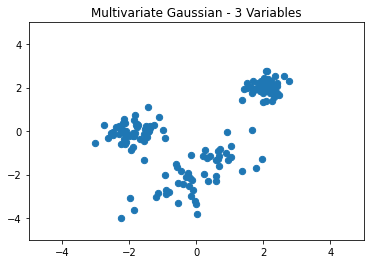

In [ ]:
# Part a - data creation. This code is from the previous homework. You do not have to edit it.
num_pts =  50
np.random.seed(10)
Xa = np.random.multivariate_normal([2,2], [[0.1,0],[0,0.1]], num_pts)
Xb = np.random.multivariate_normal([-2,0], [[0.2,0],[0,0.2]], num_pts)
Xc = np.random.multivariate_normal([0,-2], [[1,0.7],[0.7,1]], num_pts)

# Concatenate clusters into one dataset
data = np.concatenate((Xa,Xb,Xc),axis=0)

print(data.shape)

# Plotting
plt.scatter(data[:,0], data[:,1], s=40, cmap='viridis');
ax = plt.gca()
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
plt.title('Multivariate Gaussian - 3 Variables')
plt.show()

**Fill in the code to complete the EM algorithm given below.** Remember, the EM algorithm is given by a process similar to k-means/DP-means in nature, since it is iterative. However, the actual calculations done are very different. For a Gaussian mixture model, they are described by:

*E-Step (Compute probabilities with given Gaussian parameters.* **This has already been completed for you.**)


*M-Step (Update parameters. The subscript k denotes the parameter for a given cluster k, so this is calculated for each cluster.):*
Similar from 1-d case
\begin{equation*}
n\_per\_cluster = \sum_{i=1}^{n\_points} \gamma_{z_{i}}(k)
\end{equation*}

\begin{equation*}
\pi_k = \frac{n\_per\_cluster}{n\_points}
\end{equation*}

\begin{equation*}
\mu_k = \frac{1}{n\_per\_cluster} * \sum_{i=1}^{n\_points} \gamma_{z_{i}}(k) * x_i 
\end{equation*}

\begin{equation*}
\Sigma_k = \frac{1}{n\_per\_cluster} * \sum_{i=1}^{n\_points} \gamma_{z_{i}}(k) * (x_i - \mu_k)(x_i - \mu_k)^T 
\end{equation*}


*Repeat until convergence. To check for convergence, we check if the log-likelihood estimate is close enough to the previous estimate to stop the algorithm. To compute the log-likelihood estimate:*
\begin{equation*}
LL(\theta) = \sum_{i=1}^{n\_points} log \sum_{j=1}^{k} \pi_j * \frac{1}{2\pi|\Sigma_k|^\frac{1}{2}} exp(-0.5*(x_i - \mu_k)^T\Sigma_k^{-1}(x_i - \mu_k))
\end{equation*}

*Note that the "absolute value" signs around $\Sigma_j$ are actually indicative of the determinant of the covariance matrix. 

**In completing the algorithm below, you will complete the M-Step and the log-likelihood estimate. To compute the log-likelihood, we strongly recommend using `scipy.special.logsumexp`, as it is more numerically stable than manually computing.**

In [ ]:
def EStep(data, n_points, k, pi, mu, cov):
    ## Performs the expectation (E) step ##
    ## You do not need to edit this function (actually, please do not edit it..)
    # The end result is an n_points x k matrix, where each element is the probability that
    # the ith point will be in the jth cluster.
    
    expectations = np.zeros((n_points, k)) # n_points x k np.array, where each row adds to 1
    denominators = []
    
    for i in np.arange(n_points):
        denominator = 0
        for j in np.arange(k):
            # Calculate denominator, which is a sum over k
            denominator_scale = pi[j] * 1/(2 * math.pi * np.sqrt(np.linalg.det(cov[j])))

            denom = denominator_scale * np.exp(-0.5 * (data[i].reshape(2,1) - mu[j]).T @ np.linalg.inv(cov[j]) @ (data[i].reshape(2,1) - mu[j]))
            denominator = np.add(denominator, denom)
        
        denominator = np.asscalar(denominator)
        denominators.append(denominator)
    
    for i in np.arange(n_points):
        numerator = 0
        for j in np.arange(k):
            # Calculate the numerator
            numerator_scale = pi[j] * 1/(2 * math.pi * np.sqrt(np.linalg.det(cov[j])))
            numer = np.exp(-0.5 * (data[i].reshape(2,1) - mu[j]).T @ np.linalg.inv(cov[j]) @ (data[i].reshape(2,1) - mu[j]))
            numerator = numerator_scale * numer
            
            # Set the probability of the ith point for the jth cluster
            expectations[i][j] = numerator/denominators[i]
            
    return expectations

def MStep(data, n_points, k, expectations):
    ## Performs the maximization (M) step ##
    
    # We clear the parameters completely, since we recompute them each time
    mu = [np.zeros((2,1)) for _ in np.arange(k)] # 3 2x1 np.arrays in a list
    cov = [np.zeros((2,2)) for _ in np.arange(k)] # 3 2x2 np.arrays in a list
    n_per_cluster = [0, 0, 0]
    pi = [0, 0, 0]
  
    ## YOUR CODE HERE ## 
    # Update number of points in each cluster
    n_points = data.shape[0]
  
    # Update mixing weights
    for i in np.arange(n_points):
      for j in np.arange(k):
        n_per_cluster[j] = np.sum(expectations[i][j])
        pi[j] = (n_per_cluster[j] / n_points)

    # Update means
    for i in np.arange(n_points):
      for j in np.arange(k):
        mu[j] = 1/np.sum(n_per_cluster) * np.sum(expectations[:][j])*data[i][:]

    # Update covariances
    for i in np.arange(k):  
      for j in np.arange(n_points):
        cov[i] += expectations[j][i] * ((data[j].reshape(2,1)-mu[i])@ (data[j].reshape(2,1)-mu[i]).T)
      cov[i] = cov[i] / n_per_cluster[i]
    # for i in np.arange(k):
    #   print(cov[i])
    ## END YOUR CODE HERE ##
        
    return n_per_cluster, pi, mu, cov

def loglikelihood(data, n_points, k, pi, mu, cov):
    ## Calculates ML estimate ##
    likelihood = 0
    scale = [] # When using logsumexp the scale is required to be in an array
    exponents = [] # When using logsumexp the exponent is required to be in an array

    ## YOUR CODE HERE ##
    for i in np.arange(n_points):
      for j in np.arange(k):  
        scale.append((pi[j]/(2*np.pi*np.linalg.det(cov[j])**(1/2))))
        exponents.append(np.exp(-0.5*(data[i].reshape(2,1) - mu[j]).T @ np.linalg.inv(cov[j]) @(data[i].reshape(2,1) - mu[j])))

      likelihood += logsumexp(exponents, b=scale)
        #print(likelihood)
    # Compute the log-likelihood estimate
  
    ## END YOUR CODE HERE ##
        
    return likelihood

def ExpectationMaximization_GMM(data, n_per_cluster, n_points, k, pi, mu, cov):
    ## Performs expectation-maximization iteratively until convergence is reached ##
    # You do not need to edit this function.
    converged = False
    ML_estimate = 0
    iteration = 0
    
    while not converged:
        iteration +=1
        # E-Step: find probabilities
        expectations = EStep(data, n_points, k, pi, mu, cov)
        
        # M-Step: recompute parameters
        n_per_cluster, pi, mu, cov = MStep(data, n_points, k, expectations)

        # Plot the current parameters against the data
        # Ignore this, it just makes it look nice using some cool properties of eigenvectors!
        ## PLOT CODE ##
        lambda_1, v1 = np.linalg.eig(cov[0])
        lambda_1 = np.sqrt(lambda_1)
        lambda_2, v2 = np.linalg.eig(cov[1])
        lambda_2 = np.sqrt(lambda_2)
        lambda_3, v3 = np.linalg.eig(cov[2])
        lambda_3 = np.sqrt(lambda_3)

        # Plot data
        fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}) 
      #  plt.plot(x_total,y_total,'x')
        plt.scatter(data[:,0], data[:,1], s=40, cmap='viridis');
        
        # Plot ellipses
        ell1 = Ellipse(xy=(mu[0][0], mu[0][1]),
                  width=lambda_1[0]*3, height=lambda_1[1]*3,
                  angle=np.rad2deg(np.arccos(v1[0, 0])), linewidth=5, edgecolor='red', facecolor='none')
        ax.add_artist(ell1)
        
        ell2 = Ellipse(xy=(mu[1][0], mu[1][1]),
                  width=lambda_2[0]*3, height=lambda_2[1]*3,
                  angle=np.rad2deg(np.arccos(v2[0, 0])), linewidth=5, edgecolor='green', facecolor='none')
        ax.add_artist(ell2)
        
        ell3 = Ellipse(xy=(mu[2][0], mu[2][1]),
                  width=lambda_3[0]*3, height=lambda_3[1]*3,
                  angle=np.rad2deg(np.arccos(v3[0, 0])), linewidth=5, edgecolor='yellow', facecolor='none')
        ax.add_artist(ell3)
        
        axe = plt.gca()
        axe.set_xlim([-5,5])
        axe.set_ylim([-5,5])
        plt.title('Multivariate Gaussian - 3 Variables')
        plt.show()
        ## END PLOT CODE ##
        
        # Check for convergence via log likelihood
        old_ML_estimate = np.copy(ML_estimate)
        ML_estimate = loglikelihood(data, n_points, k, pi, mu, cov)
        
        if abs(old_ML_estimate - ML_estimate) < 0.01:
            converged = 1
        
    return mu, cov

**Perform EM on the GMM you created.** Put it all together! Run the completed EM function on your dataset. (This part is already done for you, just run it and see the output. The expected results are given to you)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


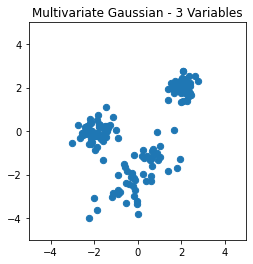

ValueError: ignored

In [ ]:
# Initialize total number of points (n), number of clusters (k),
# mixing weights (pi), means (mu) and covariance matrices (cov)
n_points = 150 # 150 points total/
k = 3  # we know there are 3 clusters
mu = [(3 - (-3)) * np.random.rand(2,1) + (-3) for _ in np.arange(k)]
cov = [10 * np.identity(2) for _ in np.arange(k)]
n_per_cluster = [n_points/k for _ in np.arange(k)] # even split for now
pi = n_per_cluster

mu_estimate, cov_estimate = ExpectationMaximization_GMM(data, n_per_cluster, n_points, k, pi, mu, cov)
print("The estimates of the parameters of the Gaussians are: ")
print("Mu:", mu_estimate)
print("Covariance:", cov_estimate)

## Problem 3: Comparison of K-Means and Gaussian Mixture
We would like you to perform K-Means and GMM for clustering using sklearn. In this Problem, we can visualize the difference of these two algorithm.

First, we can general some clustered data as follows.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


(400, 2)


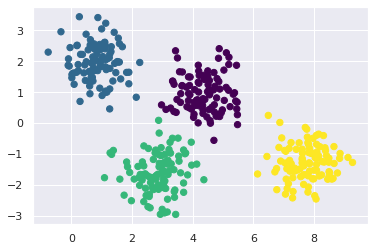

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis');

**a. Perform Kmeans and GMM on data X using build-in sklearn functions.**

You can find the documentation for instantiating and fitting `sklearn`'s `Kmeans` [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Set `n_clusters=4` and `random_state=0`.

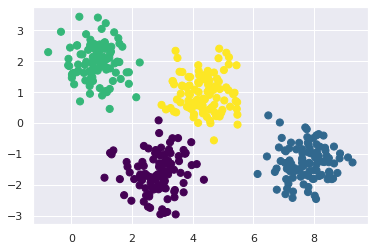

In [ ]:
from sklearn.cluster import KMeans
### ADD CODE HERE:
# Instantiate KMeans instance.
# Fit the Kmeans with the data X.
# Use the Kmeans to predict on the labels of X, here the labels is unordered.
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = kmeans.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

You can find the documentation for instantiating and fitting `sklearn`'s `GMM` [here](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html). Set `n_clusters=4` and `random_state=0`.

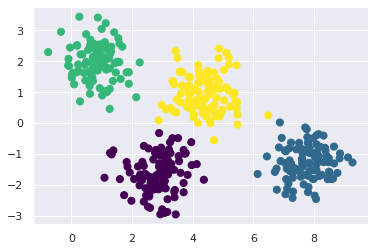

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
### ADD CODE HERE:
# Instantiate GMM instance.
# Fit the GMM with the data X.
# Use the GMM to predict on the labels of X, here the labels is unordered.
labels = GMM(n_components=4, random_state=0).fit_predict(X,y=None)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

**b. Perform Kmeans and GMM on data X_stretched using build-in sklearn functions.**

First we stretch the data by a random matrix.

In [ ]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

Applying `Kmeans` on `X_stretched` and set `n_clusters=4` and `random_state=0`.

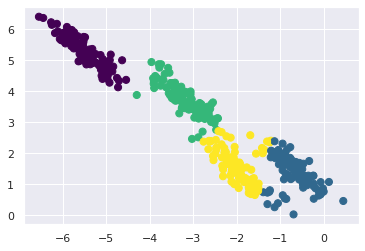

In [ ]:
from sklearn.cluster import KMeans
### ADD CODE HERE:
# Instantiate KMeans instance.
# Fit the Kmeans with the data X.
# Use the Kmeans to predict on the labels of X, here the labels is unordered.
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_stretched)
labels = kmeans.labels_
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels, s=50, cmap='viridis')

Applying `GMM` on `X_stretched` and set `n_clusters=4` and `random_state=0`.

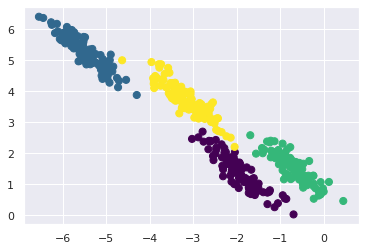

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
### ADD CODE HERE:
# Instantiate GMM instance.
# Fit the GMM with the data X.
# Use the GMM to predict on the labels of X, here the labels is unordered.
labels = GMM(n_components=4, random_state=0).fit_predict(X_stretched,y=None)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels, s=50, cmap='viridis')

**c. Conclusion.** In both previous cases Would there be any reason to better use k-means over E-M , or vice versa? For what kinds of datasets would it make more sense to use E-M to cluster? Why?